# 1D-2Class-Stochastic

In [143]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt(
    "../../../data/processed/csv/iris_1D.csv", dtype=None, delimiter=",", skip_header=1
)

X = iris[:, 0:1]
y = iris[:, 1]

# change data type
y = y.astype("uint8")

print("X:\n", X)
print("y:\n", y)

X:
 [[1.4]
 [1. ]
 [1.3]
 [1.9]
 [2. ]
 [3.8]
 [4.1]
 [3.9]
 [4.2]
 [3.4]]
y:
 [0 0 0 0 0 1 1 1 1 1]


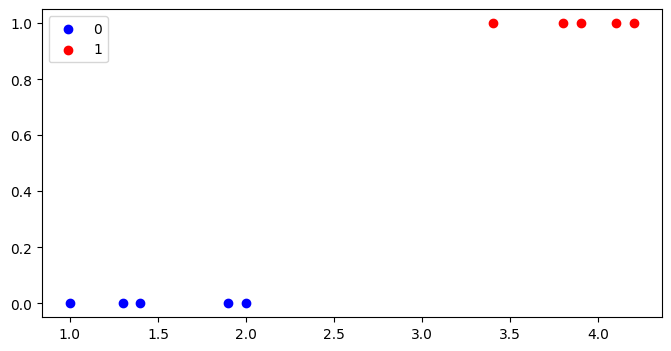

In [144]:
plt.figure(figsize=(8, 4))
plt.scatter(X[y == 0][:, 0], y[y == 0], color="b", label="0")
plt.scatter(X[y == 1][:, 0], y[y == 1], color="r", label="1")
plt.legend()
plt.show()

In [145]:
import numpy as np

N = len(y)  # numbers of samples
k = 2  # number of classes


# one_hot
def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), 2))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot


y_one_hot = convert_one_hot(y, k)
print("y_one_hot\n", y_one_hot)

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
print("X\n", X)

y_one_hot
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
X
 [[1.  1.4]
 [1.  1. ]
 [1.  1.3]
 [1.  1.9]
 [1.  2. ]
 [1.  3.8]
 [1.  4.1]
 [1.  3.9]
 [1.  4.2]
 [1.  3.4]]


In [146]:
# initialize parameters
theta = np.array([[0.1, 0.05], [0.2, -0.1]])  # (2,2)
print("theta:\n", theta)

theta:
 [[ 0.1   0.05]
 [ 0.2  -0.1 ]]


[[ 4.03270974 -3.88270974]
 [-1.49435605  1.59435605]]


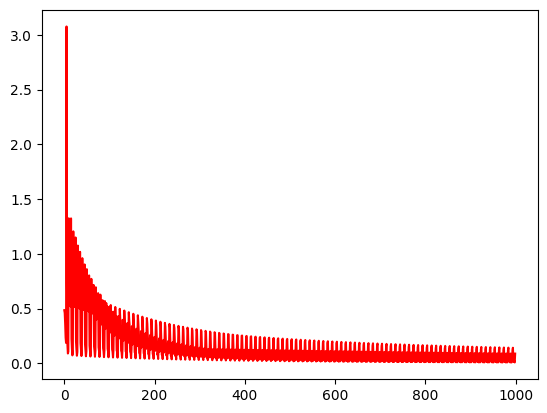

In [147]:
import numpy as np
import matplotlib.pyplot as plt


def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot


iris = np.genfromtxt(
    "../../../data/processed/csv/iris_1D.csv", dtype=None, delimiter=",", skip_header=1
)
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype("uint8")

N = len(y)  # numbers of samples
k = 2  # number of classes

y_one_hot = convert_one_hot(y, k)
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

theta = np.array([[0.1, 0.05], [0.2, -0.1]])

# some parameters
learning_rate = 0.1
losses = []
max_epoch = 100

for epoch in range(max_epoch):
    for i in range(N):
        # for each sample
        xi = X[i]  # 1,2
        yi = y_one_hot[i]  # 1,2

        xi = xi.reshape((2, 1))
        yi = yi.reshape((2, 1))

        z = theta.T.dot(xi)
        # compute y_hat
        exp_z = np.exp(z)
        y_hat = exp_z / np.sum(exp_z, axis=0)  # sum theo cột?

        # compute the loss
        loss = -np.log(yi.T.dot(y_hat))
        losses.append(loss[0])

        # compute dtheta
        dtheta = xi.dot((y_hat - yi).T)

        # update
        theta = theta - learning_rate * dtheta
print(theta)
x_axis = range(len(losses))
plt.plot(x_axis, losses, color="r")
plt.show()

In [148]:
scores = []
for i in range(N):
    xi = X[i]
    yi = y_one_hot[i]
    yi = yi.reshape((2, 1))

    # evaluate class scores
    z = theta.T.dot(xi)
    scores.append(z)

# lấy chỉ số của giá trị lớn nhất theo hàng
predicted_class = np.argmax(scores, axis=1)
predicted_class

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [149]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=uint8)

# 1D-2Class-Batch

X:
 [[1.4]
 [1. ]
 [1.3]
 [1.9]
 [2. ]
 [3.8]
 [4.1]
 [3.9]
 [4.2]
 [3.4]]
y:
 [0 0 0 0 0 1 1 1 1 1]


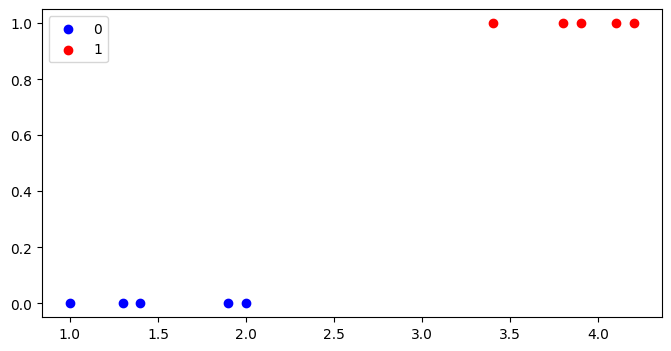

In [150]:
import numpy as np
import matplotlib.pyplot as plt


def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot


iris = np.genfromtxt(
    "../../../data/processed/csv/iris_1D.csv", dtype=None, delimiter=",", skip_header=1
)

X = iris[:, 0:1]
y = iris[:, 1]

# change data type
y = y.astype("uint8")

print("X:\n", X)
print("y:\n", y)

plt.figure(figsize=(8, 4))
plt.scatter(X[y == 0][:, 0], y[y == 0], color="b", label="0")
plt.scatter(X[y == 1][:, 0], y[y == 1], color="r", label="1")
plt.legend()
plt.show()

In [151]:
# one_hot
import numpy as np
import matplotlib.pyplot as plt

N = len(y)
k = 2

iris = np.genfromtxt(
    "../../../data/processed/csv/iris_1D.csv", dtype=None, delimiter=",", skip_header=1
)

X = iris[:, 0:1]
y = iris[:, 1]

# change data type
y = y.astype("uint8")

# print('X:\n', X)


def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot


y_one_hot = convert_one_hot(y, k)
print(y_one_hot)

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
print(X_b)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1.  1.4]
 [1.  1. ]
 [1.  1.3]
 [1.  1.9]
 [1.  2. ]
 [1.  3.8]
 [1.  4.1]
 [1.  3.9]
 [1.  4.2]
 [1.  3.4]]


In [152]:
# some hyperparameters
# Các tham số này rất quan trọng ảnh hưởng rất nhiều đến hiệu quả của mô hình
# vd: tốc độ học quá chậm thì mô hình lâu hội tụ
# càng nhiều epochs thì loss training càng giảm
# tuy nhiên cũng dễ gây overfitting
learning_rate = 0.3
losses = []
max_epoch = 7000

# initialize parameters
theta = np.array([[0.1, 0.05], [0.2, -0.1]])

for epoch in range(max_epoch):
    # compute z
    z = X_b.dot(theta)

    # compute y_hat
    exp_z = np.exp(z)
    y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss
    loss = -np.log(np.sum(y_hat * y_one_hot, axis=1))
    losses.append(np.sum(loss))
    # print(f'Loss: {np.sum(loss) / N}')

    # compute dtheta
    dtheta = X_b.T.dot(y_hat - y_one_hot) / N

    # update
    theta = theta - learning_rate * dtheta
print("theta:\n", theta)
print("loss:\n", losses[0])
print("loss:\n", losses[-1])

theta:
 [[ 8.57658241 -8.42658241]
 [-3.1157331   3.2157331 ]]
loss:
 9.739955445971244
loss:
 0.03262503237061984


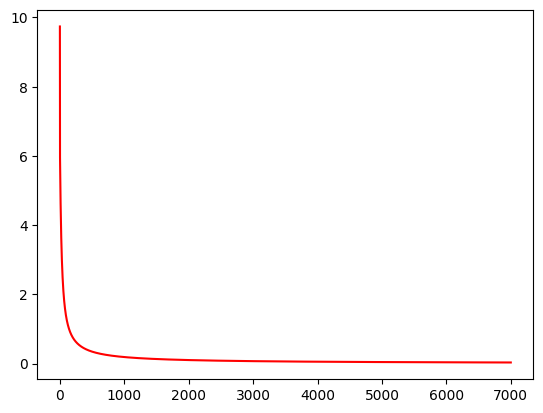

In [153]:
x_axis = range(len(losses))
plt.plot(x_axis, losses, color="r")
plt.show()

In [154]:
z = X_b.dot(theta)
exp_z = np.exp(z)
y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)
print(y_hat)

[[9.99708189e-01 2.91811071e-04]
 [9.99976808e-01 2.31915678e-05]
 [9.99845051e-01 1.54949127e-04]
 [9.93127827e-01 6.87217302e-03]
 [9.87134188e-01 1.28658123e-02]
 [8.61127248e-04 9.99138873e-01]
 [1.28964213e-04 9.99871036e-01]
 [4.57373198e-04 9.99542627e-01]
 [6.84736379e-05 9.99931526e-01]
 [1.07310982e-02 9.89268902e-01]]


In [155]:
predicted_class = np.argmax(y_hat, axis=1)
print(predicted_class)

[0 0 0 0 0 1 1 1 1 1]


In [156]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=uint8)

# 1D-3Class-Batch

X:
 [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]
 [5.2]
 [5.6]
 [5.9]]
y:
 [0 0 0 1 1 1 2 2 2]


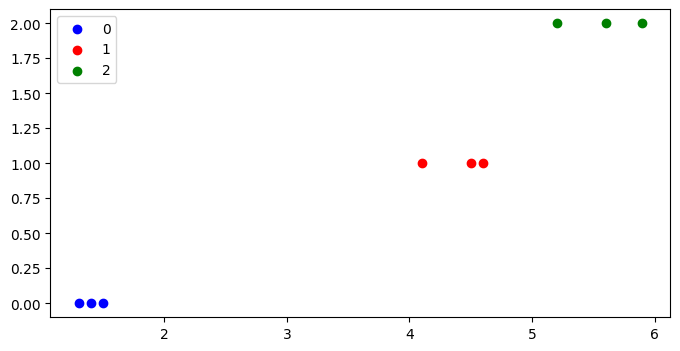

In [157]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt(
    "../../../data/processed/csv/iris_1D_3C.csv",
    dtype=None,
    delimiter=",",
    skip_header=1,
)
X = iris[:, 0:1]  # col 1
y = iris[:, 1]  # col 2

# change data type
y = y.astype("uint8")

print("X:\n", X)
print("y:\n", y)

plt.figure(figsize=(8, 4))
# Trường hợp này đầu ra có 3 label
plt.scatter(X[y == 0][:, 0], y[y == 0], color="b", label="0")
plt.scatter(X[y == 1][:, 0], y[y == 1], color="r", label="1")
plt.scatter(X[y == 2][:, 0], y[y == 2], color="g", label="2")
plt.legend()
plt.show()

In [158]:
N = len(y)
d = 2  # dimensionality
k = 3  # number of classes


# one_hot
def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot


y_one_hot = convert_one_hot(y, k)
print(y_one_hot)

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
print(X_b)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]
 [1.  5.2]
 [1.  5.6]
 [1.  5.9]]


In [159]:
# initialize parameters
theta = 0.01 * np.random.randn(d, k)
print("theta:\n", theta)

# some parameters
learning_rate = 0.4
losses = []
num_iter = 2000

for epoch in range(num_iter):
    # evaluate class scores
    z = X_b.dot(theta)

    # compute the class probabilities
    exp_z = np.exp(z)
    y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss
    loss = -np.log(np.sum(y_hat * y_one_hot, axis=1))
    losses.append(np.sum(loss))

    # compute the gradient on scores
    dz = y_hat - y_one_hot

    # backpropate the gradient to the parameters (W,b)
    dtheta = X_b.T.dot(dz)

    # perform a parameter update
    theta = theta - learning_rate * dtheta

print("theta after:\n", theta)
print("loss 0:\n", losses[0])
print("loss end:\n", losses[-1])

theta:
 [[-0.00358002  0.00625365  0.00293639]
 [ 0.00573117  0.00373106 -0.02084991]]
theta after:
 [[ 28.41806073  14.90863285 -43.32108356]
 [ -7.23392676  -2.3231773    9.54571638]]
loss 0:
 10.04392696973264
loss end:
 0.0704613555097249


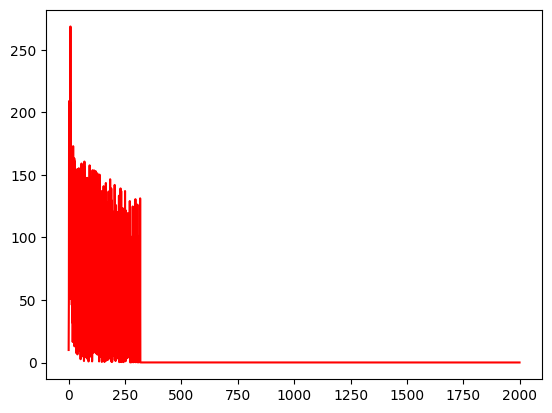

In [160]:
x_axis = range(len(losses))
plt.plot(x_axis, losses, color="r")
plt.show()

In [161]:
z = X_b.dot(theta)
exp_z = np.exp(z)
y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)
print(y_hat)

[[9.98687330e-01 1.31266983e-03 1.11107667e-21]
 [9.99196278e-01 8.03721586e-04 2.07603492e-22]
 [9.97856787e-01 2.14321292e-03 5.94447284e-21]
 [1.84628257e-04 9.91812192e-01 8.00317973e-03]
 [1.32539978e-03 9.98604714e-01 6.98857655e-05]
 [1.10972410e-04 9.74131151e-01 2.57578768e-02]
 [1.77359217e-07 2.96403283e-02 9.70359494e-01]
 [2.22271355e-10 2.64848367e-04 9.99735151e-01]
 [1.44811595e-12 7.52888315e-06 9.99992471e-01]]


In [162]:
# Lấy chỉ số mà tại đó có giá trị lớn nhất theo hàng
predicted_class = np.argmax(y_hat, axis=1)
print(predicted_class)

[0 0 0 1 1 1 2 2 2]


In [163]:
y

array([0, 0, 0, 1, 1, 1, 2, 2, 2], dtype=uint8)

# 2D-3Class-Batch

In [164]:
import numpy as np
import matplotlib.pyplot as plt

iris = np.genfromtxt(
    "../../../data/processed/csv/iris_2D_3c.csv",
    dtype=None,
    delimiter=",",
    skip_header=1,
)
print(iris.shape)
# Lúc này đầu vào có 2 features, đầu ra 3 label
X = iris[:, 0:2]
y = iris[:, 2]

# change data type
y = y.astype("uint8")

print("X:\n", X)
print("y:\n", y)

(9, 3)
X:
 [[1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [4.7 1.6]
 [3.3 1.1]
 [4.6 1.3]
 [5.6 2.2]
 [5.1 1.5]
 [5.6 1.4]]
y:
 [0 0 0 1 1 1 2 2 2]


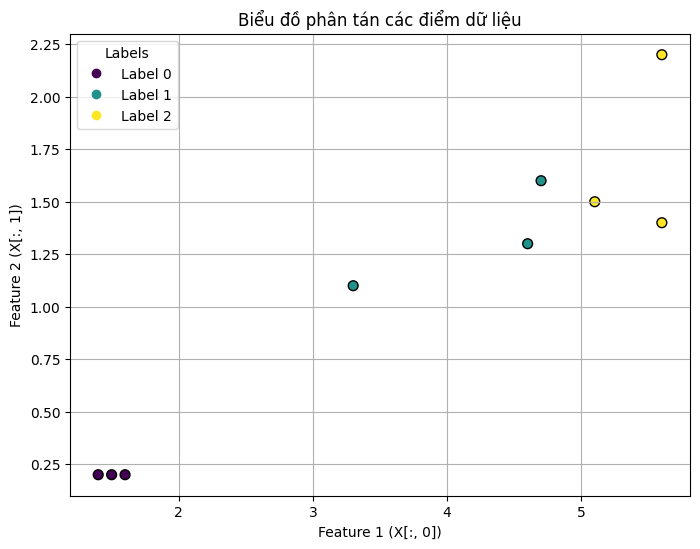

In [165]:
# Tạo biểu đồ phân tán (scatter plot)
plt.figure(figsize=(8, 6))

# plt.scatter() nhận X[:, 0] làm tọa độ x, X[:, 1] làm tọa độ y, và c=y để xác định màu sắc dựa trên nhãn
# cmap='viridis' là một tùy chọn màu sắc
# màu sắc của từng điểm dữ liệu được xác định bởi các giá trị trong mảng.
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=50, edgecolors="k")

# Thêm tiêu đề và nhãn cho các trục
plt.title("Biểu đồ phân tán các điểm dữ liệu")
plt.xlabel("Feature 1 (X[:, 0])")
plt.ylabel("Feature 2 (X[:, 1])")

# Thêm chú giải (legend) để phân biệt các label
# Lấy các label duy nhất và tạo legend
unique_labels = np.unique(y)
legend_labels = [f"Label {label}" for label in unique_labels]
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Labels")

# Hiển thị lưới
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

In [166]:
N = len(y)
d = 3  # dimensionality
k = 3  # number of classes


# one_hot
def convert_one_hot(y, k):
    one_hot = np.zeros((len(y), k))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot


y_one_hot = convert_one_hot(y, k)
print(y_one_hot)

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
print(X_b)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1.  1.5 0.2]
 [1.  1.4 0.2]
 [1.  1.6 0.2]
 [1.  4.7 1.6]
 [1.  3.3 1.1]
 [1.  4.6 1.3]
 [1.  5.6 2.2]
 [1.  5.1 1.5]
 [1.  5.6 1.4]]


In [167]:
# initialize parameters
theta = 0.01 * np.random.randn(d, k)
print("theta:\n", theta)

# some parameters
learning_rate = 0.02
losses = []
num_iter = 3000

for epoch in range(num_iter):
    # evaluate class scores
    z = X_b.dot(theta)

    # compute the class probabilities
    exp_z = np.exp(z)
    y_hat = exp_z / np.sum(exp_z, axis=1, keepdims=True)

    # compute the loss
    loss = -np.log(np.sum(y_hat * y_one_hot, axis=1))
    losses.append(np.sum(loss))

    # compute the gradient on scores
    dz = y_hat - y_one_hot

    # backpropate the gradient to the parameters (W,b)
    dtheta = X_b.T.dot(dz)

    # perform a parameter update
    theta = theta - learning_rate * dtheta

print("theta after:\n", theta)
print("loss 0:\n", losses[0])
print("loss end:\n", losses[-1])

theta:
 [[-0.0074909   0.00911552 -0.01090136]
 [-0.00996503 -0.00791042 -0.00920808]
 [ 0.0010089   0.01052642  0.01295272]]
theta after:
 [[  7.9957396    2.56452253 -10.56953887]
 [ -1.23616186  -0.84899507   2.05807341]
 [ -4.28280364   2.50424667   1.80304501]]
loss 0:
 9.85200451773719
loss end:
 1.711497090212901


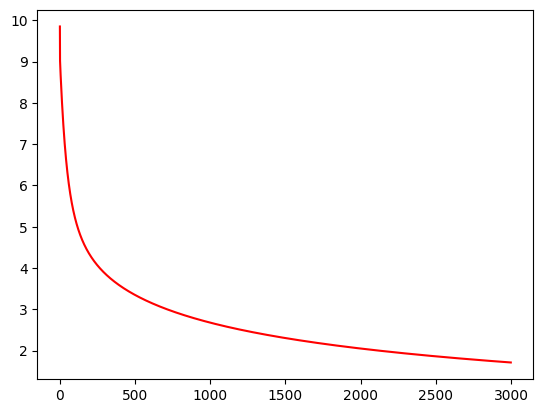

In [168]:
x_axis = range(len(losses))
plt.plot(x_axis, losses, color="r")
plt.show()

In [169]:
z = X_b.dot(theta)
y_hat = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
print(y_hat)

[[9.70485715e-01 2.95103152e-02 3.97011930e-06]
 [9.71575648e-01 2.84214926e-02 2.85906620e-06]
 [9.69354966e-01 3.06395217e-02 5.51269633e-06]
 [4.58172751e-04 6.43703604e-01 3.55838223e-01]
 [3.47064879e-02 9.52524030e-01 1.27694820e-02]
 [3.73932080e-03 6.59722687e-01 3.36537992e-01]
 [1.43445533e-06 1.67579454e-01 8.32419111e-01]
 [4.14705583e-04 3.45061477e-01 6.54523817e-01]
 [2.01126209e-04 1.03024286e-01 8.96774588e-01]]


In [170]:
predicted_class = np.argmax(y_hat, axis=1)
print(predicted_class)

[0 0 0 1 1 1 2 2 2]


In [171]:
y

array([0, 0, 0, 1, 1, 1, 2, 2, 2], dtype=uint8)